In [1]:
import numpy as np 
import matplotlib.pyplot as plt 

## Part 2

In [2]:
def oil(y0, x0, h, N, f):   # f is a lambda function
    vals = np.array([])
    vals = np.append(vals, y0)
    x_vals = np.arange(x0, x0 + N*h, h)
    for i in range(1, len(x_vals)):
        y_i1 = vals[-1] + h*f(vals[-1])
        vals = np.append(vals, y_i1)
    return x_vals, vals

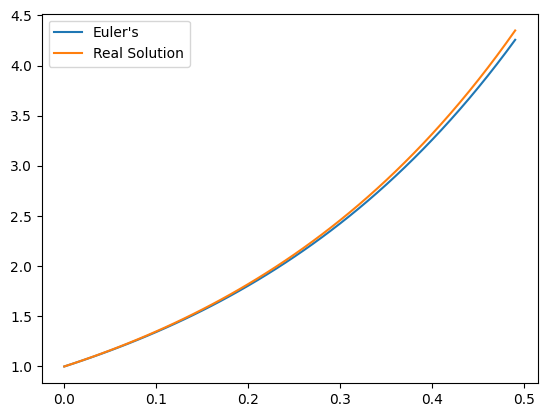

In [3]:
# for problem a
f = lambda y: 3*y

x, y = oil(1, 0, 0.01, 50, f)

plt.plot(x,y, label = "Euler's")
plt.plot(x, np.exp(3*x), label = "Real Solution")
plt.legend()

Introduce $v(x) = f'(x)$ to make our lives easier. So:<br>
\begin{equation}
    f'(x) = v(x)
\end{equation}
and<br>
\begin{equation}
v'(x) = -9f(x)
\end{equation}

In [4]:
def oil2(f0, v0, x0, h, N, f_prime, v_prime):
    f_vals = np.array([])
    f_vals = np.append(f_vals, f0)
    v_vals = np.array([])
    v_vals = np.append(v_vals, v0)
    x_vals = np.arange(x0, x0 + N*h, h)

    for i in range(1, len(x_vals)):
        fi = f_vals[i-1] + h * f_prime(v_vals[i-1])
        vi = v_vals[i-1] + h * v_prime(f_vals[i-1])

        f_vals = np.append(f_vals, fi)
        v_vals = np.append(v_vals, vi)
    return x_vals, f_vals, v_vals

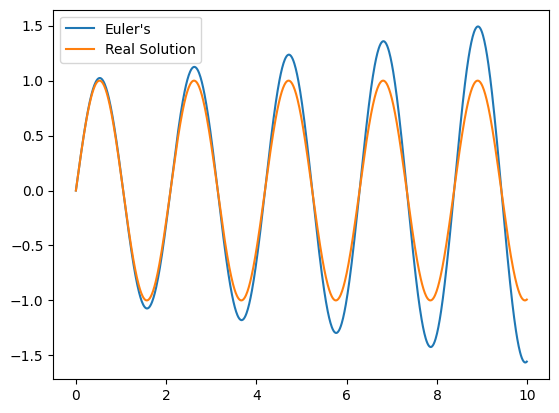

In [5]:
# for problem b
f_prime = lambda y: y
v_prime = lambda y: -9*y

x, f, v = oil2(0, 3, 0, 0.01, 1000, f_prime, v_prime)

plt.plot(x,f, label = "Euler's")
plt.plot(x, np.sin(3*x), label = "Real Solution")
plt.legend()

Text(0.5, 1.0, "f'(x) plot")

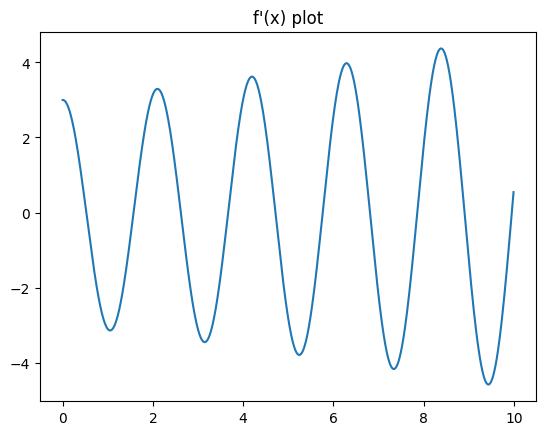

In [6]:
plt.plot(x,v)
plt.title("f'(x) plot")

In [7]:
def oil2point5(f0, v0, x0, h, N, f_prime, v_prime):
    f_vals = np.array([])
    f_vals = np.append(f_vals, f0)
    v_vals = np.array([])
    v_vals = np.append(v_vals, v0)
    x_vals = np.arange(x0, x0 + N*h, h)

    for i in range(1, len(x_vals)):
        fi = f_vals[i-1] + h * f_prime(v_vals[i-1])
        vi = v_vals[i-1] + h * v_prime(x_vals[i],f_vals[i-1])

        f_vals = np.append(f_vals, fi)
        v_vals = np.append(v_vals, vi)
    return x_vals, f_vals, v_vals

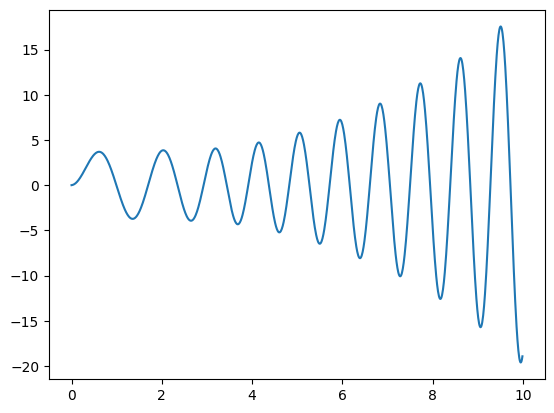

In [8]:
# Part c

f_prime = lambda y: y
v_prime = lambda x,y: (2/(x**2) - 30 / (1+ np.exp(-(x-3)/0.5)) - 20)*y

x, f, v = oil2point5(0, 1, 0, 0.01, 1000, f_prime, v_prime)

plt.plot(x,f)

## Part 3

To solve:
\begin{equation}
    \theta'' + \frac{g}{l}sin\theta = 0
\end{equation}

set $a = \frac{g}{l}$ for convenience<br>
Now we can rearrange the equation to get:
\begin{equation}
    \theta'' = -a sin\theta
\end{equation}

Use the small angle approximation $sin\theta \approx \theta$ to simplify:
\begin{equation}
    \theta'' = -a \theta
\end{equation}

The general solution to this ODE is: $c_1 cos(x) + c_2 sin(x)$
So:
\begin{equation}
    \theta = c_1 cos(\sqrt a x) + c_2 sin(\sqrt a x)
\end{equation}

Yay we did it
\begin{equation}
    \theta = c_1 cos(\sqrt \frac{g}{l} x) + c_2 sin(\sqrt \frac{g}{l} x)
\end{equation}

To solve for the real solution, we can set the initial values to: <br>
$f(0) = 1$, $f'(0) = 3$, $g = 9.81$, $l = 3$<br>
We can set:
\begin{equation}
    1 = c_1 cos(1.81 \times 0) + c_2 sin(1.81 \times 0) = c_1*0 + c_2
\end{equation}
So: $c_1 = 1$

Now we have to use $f'(0) = 3$ by doing the following:

\begin{equation}
    \theta' = -c_1 * 1.81 sin(1.81 \times x) + c_2 * 1.81 cos(1.81 \times x)
\end{equation}

So:
\begin{equation}
    3 = -c_1 * 1.81 sin(1.81 \times 0) + c_2 * 1.81 cos(1.81 \times 0)
\end{equation}
Which is equal to: $-1.81\times 0\times c_1 + c_2 \times 1.81 \times 1$

So: $c_2 = 1.66$

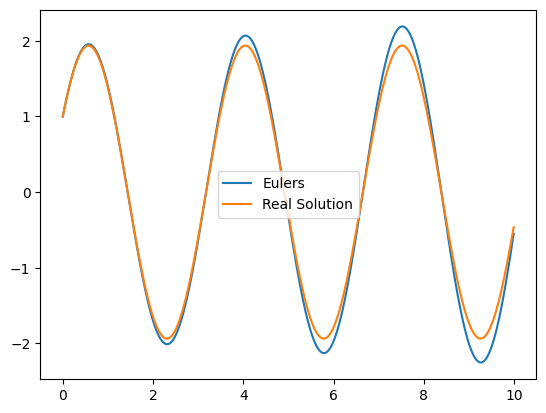

In [9]:
g = 9.81
l = 3

f_prime = lambda y: y
v_prime = lambda y: -(g/l)*y

x, f, v = oil2(1, 3, 0, 0.01, 1000, f_prime, v_prime)

plt.plot(x,f, label = "Eulers")
plt.plot(x, np.cos(np.sqrt(g/l)*x)+(1.66*np.sin(np.sqrt(g/l)*x)), label="Real Solution")
plt.legend()